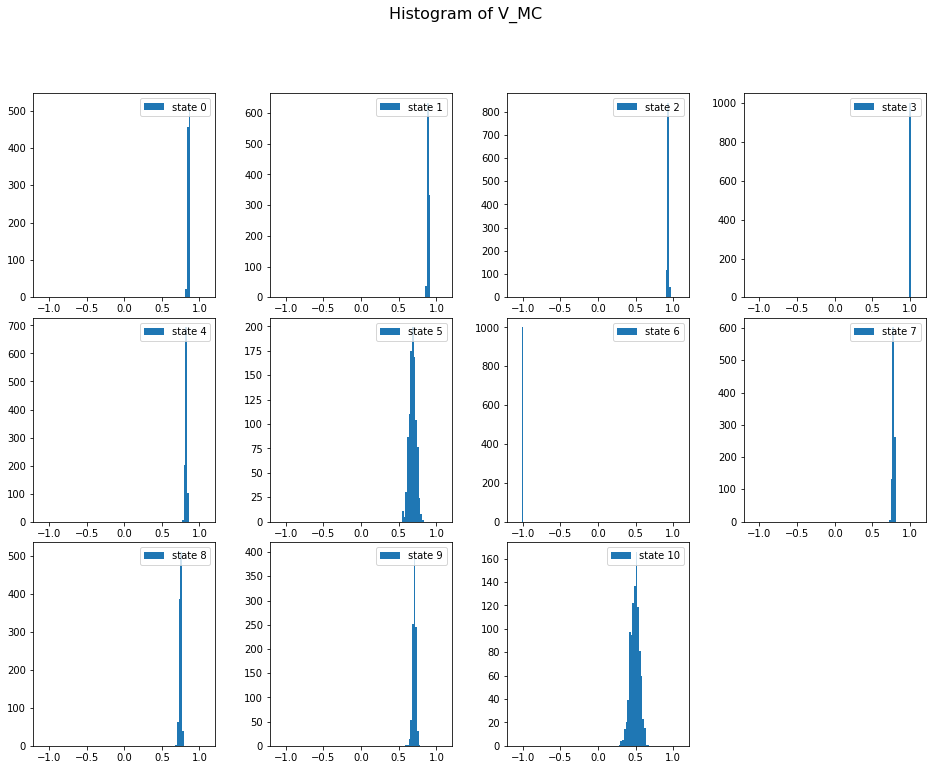

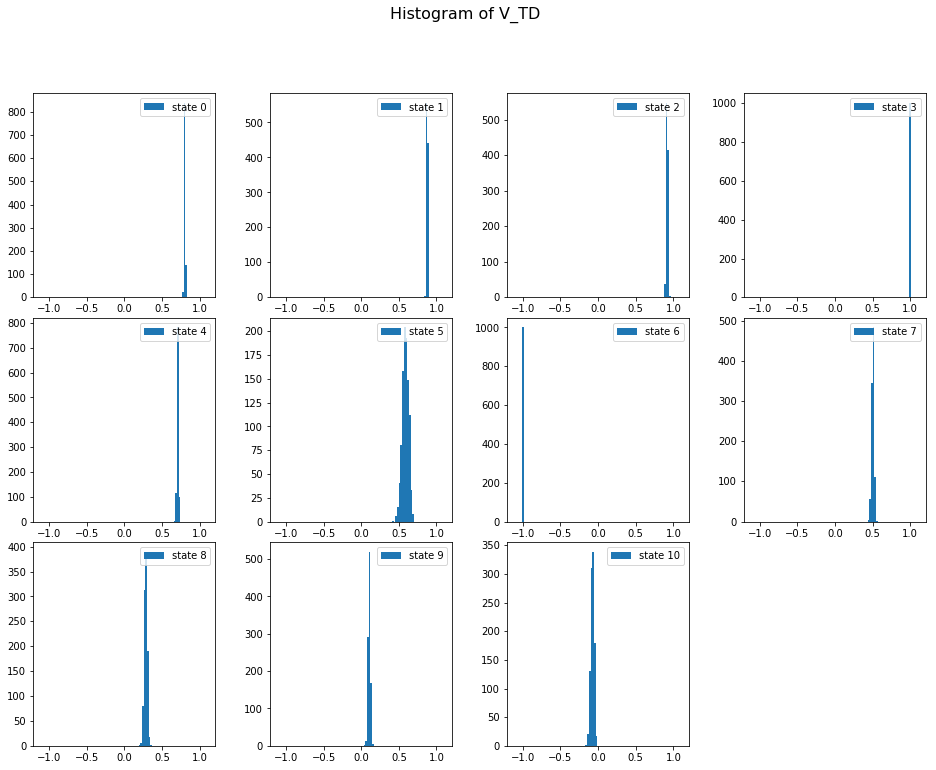

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

# No need this line when you run py file
%matplotlib inline
# No need this line when you run py file

# set parameters ###############################################################
epoch = 1000
alpha = 0.01
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 0: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

    
# Every-Visit Monte-Carlo Policy Evaluation
def V_MC():
    
    # n_visits records number of visits for each state
    # cum_gains records cumulative gains, i.e., sum of gains for each state
    # where
    # gain = reward + gamma * next_reward + gamma^2 * ...

    n_visits = np.zeros(N_STATES)
    cum_gains = np.zeros(N_STATES)

    for _ in range(epoch):

        # simulation_history records visited states including the terminal states 3 and 6
        # reward_history records occured rewards including final rewards 1. and -1. 
        simulation_history = []
        reward_history = []

        # indicate game is not over yet
        done = False

        # choose initial state randomly, not from 3 or 6
        s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  

        while not done:

            # choose action using current policy
            a = np.random.choice(actions, p=policy[s, :])
            simulation_history.append(s)
            reward_history.append(R[s,a])

            # choose next state using transition probabilities
            s1 = np.random.choice(states, p=P[s, a, :])

            if s1 == 3:
                # if game is over, 
                # ready to break while loop by letting done = True
                # append end result to simulation_history 
                done = True
                simulation_history.append(s1)
                reward_history.append(R[s1,0])
            elif s1 == 6:
                # if game is over, 
                # ready to break while loop by letting done = True
                # append end result to simulation_history 
                done = True
                simulation_history.append(s1)
                reward_history.append(R[s1,0])
            else:
                # if game is not over, continue playing game
                s = s1

        # reward_history records occured rewards including final rewards 1 and -1  
        simulation_history = np.array(simulation_history)
        reward_history = np.array(reward_history)
        n = len(reward_history)

        # gain_history records occured gains 
        gain_history = deepcopy(reward_history) 
        for i, reward in enumerate(reward_history[:-1][::-1]): 
            gain_history[n-i-2] = reward + gamma * gain_history[n-i-2+1]

        # update n_visits and cum_gains     
        for i in range(N_STATES):
            n_visits[i] += np.sum(simulation_history==i) 
            cum_gains[i] += np.sum(gain_history[simulation_history==i]) 

    V = cum_gains / (n_visits + 1.0e-8) 
    
    return V


V_history = np.empty((1000, N_STATES))
for i in range(1000):
    V_history[i, :] = V_MC()
    
fig = plt.figure(figsize=(16, 12))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
fig.suptitle("Histogram of V_MC", fontsize=16)

for s in range(N_STATES):
    ax = fig.add_subplot(3, 4, s + 1)
    bins = np.linspace(-1.1,1.1,100)
    label = "state {}".format(str(s))
    ax.hist(V_history[:, s], bins=bins, label=label)
    ax.legend(loc='upper right')

plt.show()


# TD
def V_TD():
    
    V = np.zeros(N_STATES)
    V[3] = 1.
    V[6] = -1.

    for _ in range(epoch):

        # indicate game is not over yet
        done = False

        # choose initial state randomly, not from 3 or 6
        s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  

        while not done:
            # choose action using current policy
            a = np.random.choice(actions, p=policy[s, :])

            # choose next state using transition probabilities
            s1 = np.random.choice(states, p=P[s, a, :])

            # TD
            # V(S_t)\leftarrow V(S_t)+\alpha(R_{t+1}+\gamma V(S_{t+1})-V(S_t))
            V[s] += alpha * (R[s,a] + gamma * V[s1] - V[s]) 

            if (s1 == 3) or (s1 == 6):
                # if game is over, 
                # ready to break while loop by letting done = True
                done = True
            else:
                # if game is not over, continue playing game
                s = s1

    return V


V_history = np.empty((1000, N_STATES))
for i in range(1000):
    V_history[i, :] = V_TD()
    
fig = plt.figure(figsize=(16, 12))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
fig.suptitle("Histogram of V_TD", fontsize=16)

for s in range(N_STATES):
    ax = fig.add_subplot(3, 4, s + 1)
    bins = np.linspace(-1.1,1.1,100)
    label = "state {}".format(str(s))
    ax.hist(V_history[:, s], bins=bins, label=label)
    ax.legend(loc='upper right')

plt.show()  